<a href="https://colab.research.google.com/github/gursimranWadhwa/Lifetime-of-lithium-ion-battery-using-ML/blob/main/IOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import os
def sortKeyFunc(s):
    return int(os.path.basename(s)[4:-4])

def readTrainData(file):
    files = glob.glob('/content/drive/MyDrive/IOP/IOP/data_neha/' + file + '/*.csv')
    files.sort(key=sortKeyFunc) 
    
    l = len(files)
    data = np.zeros((l,1000,99))
    for k, file in enumerate(files):
        cell = np.genfromtxt(file,delimiter=',')
        data[k,:,:] = cell 
    
    return data


In [ ]:
train_data_org = readTrainData('train')
test_data_org = readTrainData('test1')


In [ ]:
test_data_org.shape

(43, 1000, 99)

In [ ]:
train_data_org.shape

(41, 1000, 99)

In [ ]:
def readTestData(file):
    files = np.log10(np.genfromtxt('/content/drive/MyDrive/IOP/IOP/data_neha/cycle_lives/'+file+'_cycle_lives.csv'))
    return files
train_out = readTestData('train')
test_out = readTestData('test1')

# /content/drive/MyDrive/IOP/IOP/data_neha/cycle_lives/train_cycle_lives.csv

In [ ]:
train_data = (train_data_org[:, ::10, 98]) - (train_data_org[:, ::10, 8])
test_data = (test_data_org[:, ::10, 98]) -(test_data_org[:, ::10, 8])


In [ ]:
test_data = np.concatenate([test_data[:21], test_data[22:]])
test_out = np.concatenate([test_out[:21], test_out[22:]])

In [ ]:
test_data

array([[ 5.4770e-05,  1.7374e-05,  2.5410e-05, ...,  3.0000e-04,
         7.0000e-04,  6.0000e-04],
       [ 8.7800e-06,  1.1779e-05, -2.0900e-06, ..., -9.0000e-04,
        -1.0000e-03, -9.0000e-04],
       [ 4.1640e-05,  2.9562e-05,  6.6900e-06, ..., -1.3000e-03,
        -1.3000e-03, -1.2000e-03],
       ...,
       [ 9.7240e-05,  4.3371e-05,  1.1670e-05, ..., -1.2900e-02,
        -1.2700e-02, -1.2500e-02],
       [-7.2060e-05, -6.8024e-05, -3.2380e-05, ..., -1.5800e-02,
        -1.5500e-02, -1.5300e-02],
       [ 4.2390e-05,  8.2480e-06,  2.2800e-06, ..., -3.9000e-03,
        -3.7000e-03, -3.8000e-03]])

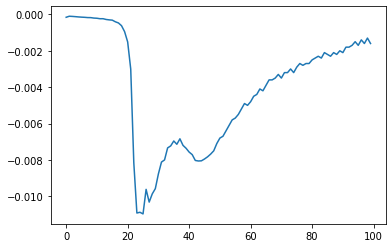

In [ ]:
plt.plot(train_data[0])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(
    n_estimators = 1000, random_state = 0)
regressor.fit(train_data, train_out)
train_pred_rf= regressor.predict(train_data)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(train_pred_rf,train_out))

0.9313733706505255


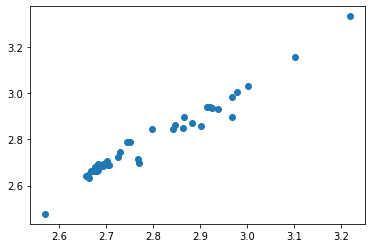

In [ ]:
plt.scatter(train_pred_rf,train_out)
plt.show()

In [ ]:
test_pred_rf = regressor.predict(test_data)
print(r2_score(test_pred_rf,test_out))

0.7425141947688814


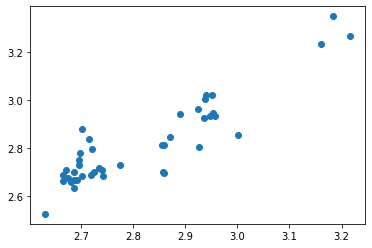

In [ ]:
plt.scatter(test_pred_rf,test_out)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb_r = AdaBoostRegressor(n_estimators = 300)
adb_r.fit(train_data, train_out)

# Predicting a new result
train_pred_adb = adb_r.predict(train_data)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(train_pred_adb,train_out))

0.9714740603926058


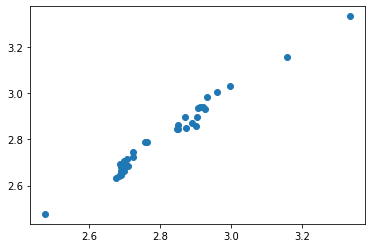

In [ ]:
plt.scatter(train_pred_adb,train_out)
plt.show()

In [ ]:
test_pred_adb = adb_r.predict(test_data)
print(r2_score(test_pred_adb,test_out))

0.8110994675593152


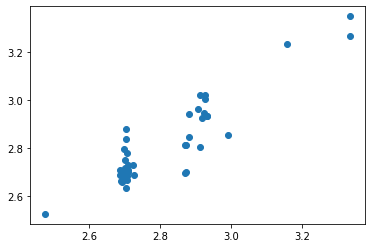

In [ ]:
plt.scatter(test_pred_adb,test_out)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
lratios = []
for lratio in range(1,10):
  eNet = make_pipeline(StandardScaler(with_mean=False), 
      ElasticNetCV(l1_ratio = lratio/10, 
                   max_iter=100000))
  eNet.fit(train_data,train_out)
  train_pred_eNet = eNet.predict(train_data)
  lratios.append(r2_score(train_pred_eNet,train_out))
final_lratio = np.argmax(np.array(lratios) + 1)/10

In [ ]:
eNet = make_pipeline(StandardScaler(with_mean=False), 
    ElasticNetCV(l1_ratio = final_lratio, max_iter=100000))

In [ ]:
final_lratio

0.8

In [ ]:
eNet.fit(train_data,train_out)
train_pred_eNet = eNet.predict(train_data)

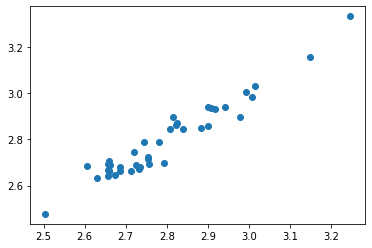

In [ ]:
plt.scatter(train_pred_eNet,train_out)
plt.show()

In [ ]:
print(r2_score(train_pred_eNet,train_out))

0.9177683085222065


In [ ]:
test_pred_eNet = eNet.predict(test_data)

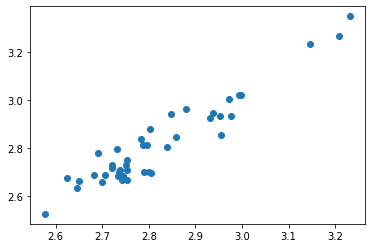

In [ ]:
plt.scatter(test_pred_eNet,test_out)
plt.show()

In [ ]:
print(r2_score(test_pred_eNet,test_out))

0.8440026721737189


In [ ]:
from sklearn.svm import SVR
val = []
for c in range(11,20):
  svr = make_pipeline(StandardScaler(with_mean=False), SVR(C = c/10))
  svr.fit(train_data,train_out)
  train_pred_svr = svr.predict(train_data)
  val.append(r2_score(train_pred_svr,train_out))

print(np.array(val))
final_c= np.argmax(np.array(val))/10 +0.1

[0.46083642 0.46924128 0.47401006 0.47401006 0.47401006 0.47401006
 0.47401006 0.47401006 0.47401006]


In [ ]:
test_pred_svm = eNet.predict(test_data)
print(r2_score(test_pred_svm,test_out))

0.8440026721737189


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(64, input_dim=train_data.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
from keras.metrics import MeanSquaredError
model.compile(loss='mse', optimizer='adam', metrics=[MeanSquaredError()])

In [ ]:
model.fit(train_data, train_out, epochs=500, batch_size=4)

Epoch 1/500
11/11 [==============================] - 1s 5ms/step - loss: 7.2029 - mean_squared_error: 7.2029
Epoch 2/500
11/11 [==============================] - 0s 3ms/step - loss: 4.5925 - mean_squared_error: 4.5925
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 1.0486 - mean_squared_error: 1.0486
Epoch 4/500
11/11 [==============================] - 0s 3ms/step - loss: 0.9594 - mean_squared_error: 0.9594
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 0.7337 - mean_squared_error: 0.7337
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 0.5255 - mean_squared_error: 0.5255
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 0.4850 - mean_squared_error: 0.4850
Epoch 8/500
11/11 [==============================] - 0s 3ms/step - loss: 0.4292 - mean_squared_error: 0.4292
Epoch 9/500
11/11 [==============================] - 0s 3ms/step - loss: 0.3593 - mean_squared_error: 0.3593
Epoch 10/500
11/11 

In [ ]:
train_pred_ann=model.predict(train_data)
print(r2_score(train_pred_ann,train_out))

0.7153667026594905


In [ ]:
test_pred_ann=model.predict(test_data)
print(r2_score(test_pred_ann,test_out))

0.7690732566442161
